In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from source import data_import
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import os 

In [2]:
df = data_import.load_pyarrow(file_name="feature_extracted")

/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/source/../data/feature_extracted.arrow was loaded.


In [3]:
df.head()

,seizure_id,segment_id,is_seizure,F4-C4_std,F4-C4_var,F4-C4_mean,F4-C4_abs_mean,F4-C4_delta,F4-C4_theta,F4-C4_gamma,...,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_std,CZ-PZ_var,CZ-PZ_mean,CZ-PZ_abs_mean,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,0,1,False,25.278278,638.991344,0.642823,19.767362,99.724544,33.651173,0.131576,...,115.680103,29.233559,0.343249,35.447713,1256.540374,0.758870,27.466555,194.364620,76.886992,0.174189
1,0,2,False,24.908361,620.426452,0.459926,19.018136,80.467433,30.739370,0.113581,...,98.999296,24.519002,0.363930,33.861154,1146.577756,0.040398,24.488472,187.417290,34.401955,0.181605
2,0,3,False,25.078313,628.921793,-0.336786,18.864175,97.815139,19.120020,0.108965,...,76.273119,21.891098,0.347473,30.472674,928.583879,0.139786,23.040842,117.606520,31.998680,0.155509
3,0,4,False,23.796227,566.260437,0.571550,18.298645,78.057846,22.859691,0.112154,...,111.418632,24.584840,0.326450,30.803236,948.839359,0.347514,23.812672,158.377845,31.605055,0.181355
4,0,5,False,28.030262,785.695596,-0.156618,21.895794,102.786435,31.697164,0.123064,...,115.905093,37.751880,0.323275,39.120852,1530.441051,-0.032786,29.786483,215.122132,60.283108,0.170928


In [4]:
df.shape

(1138, 73)

In [5]:
# Uncomment if you want to try without "segment_id"
#drop_features = ["segment_id"]
#model_df = df.drop(columns=drop_features)

# Uncomment if you want to try with "segment_id"
model_df = df

In [6]:
y = model_df["is_seizure"]
X = model_df.drop(columns=["is_seizure", "seizure_id","segment_id" ])

In [7]:
X.head()

,F4-C4_std,F4-C4_var,F4-C4_mean,F4-C4_abs_mean,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_std,F3-C3_var,F3-C3_mean,...,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_std,CZ-PZ_var,CZ-PZ_mean,CZ-PZ_abs_mean,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,25.278278,638.991344,0.642823,19.767362,99.724544,33.651173,0.131576,28.577184,816.655466,-0.136380,...,115.680103,29.233559,0.343249,35.447713,1256.540374,0.758870,27.466555,194.364620,76.886992,0.174189
1,24.908361,620.426452,0.459926,19.018136,80.467433,30.739370,0.113581,22.789379,519.355782,0.607864,...,98.999296,24.519002,0.363930,33.861154,1146.577756,0.040398,24.488472,187.417290,34.401955,0.181605
2,25.078313,628.921793,-0.336786,18.864175,97.815139,19.120020,0.108965,24.208610,586.056809,0.020483,...,76.273119,21.891098,0.347473,30.472674,928.583879,0.139786,23.040842,117.606520,31.998680,0.155509
3,23.796227,566.260437,0.571550,18.298645,78.057846,22.859691,0.112154,27.059930,732.239825,0.170771,...,111.418632,24.584840,0.326450,30.803236,948.839359,0.347514,23.812672,158.377845,31.605055,0.181355
4,28.030262,785.695596,-0.156618,21.895794,102.786435,31.697164,0.123064,28.681243,822.613674,0.019398,...,115.905093,37.751880,0.323275,39.120852,1530.441051,-0.032786,29.786483,215.122132,60.283108,0.170928


In [11]:
def run_classification_models(X, y, models=None, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    
  
        
    if models is None:
        models = {
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier(),
            'Gradient Boosting': GradientBoostingClassifier(),
            'XGBoost': XGBClassifier(),
            # Add more models here
        }

    for model_name, model in models.items():
        print(f"Model: {model_name}")

        # Train the model on the training data
        model.fit(X_train, y_train)
        
        # Save the trained model using joblib
        save_path = "ai2/models/"
        if not os.path.exists(save_path):
           os.makedirs(save_path)
        model_save_path = f"{save_path}{model_name.lower().replace(' ', '_')}_model.joblib"
        joblib.dump(model, model_save_path)
        print(f"Model saved at: {model_save_path}")

        # Make predictions on the test data
        y_pred = model.predict(X_test)
        
        # Calculate and display the confusion matrix
        confusion = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(confusion)
        
        # Generate a classification report with various metrics
        report = classification_report(y_test, y_pred)
        print("Classification Report:")
        print(report)
        
        # Plot the confusion matrix
        labels = ['No Seizure', 'Seizure']
        mat = confusion.T  # Transpose to match your reference code
        sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
        plt.xlabel('True label')
        plt.ylabel('Predicted label')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()
        print()
    

In [9]:
# def run_classification_models(X, y, models=None, cv=5, test_size=0.2):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    
#     if models is None:
#         models = {
#             'Logistic Regression': {
#                 'model': LogisticRegression(),
#                 'params': {
#                     'C': [0.001, 0.01, 0.1, 1, 10],
#                     'max_iter': [1000, 1500, 2000]
#                 }
#             },
#             'Random Forest': {
#                 'model': RandomForestClassifier(),
#                 'params': {
#                     'n_estimators': [100, 200, 300],
#                     'max_depth': [None, 10, 20],
#                     'min_samples_split': [2, 5, 10],
#                     'min_samples_leaf': [1, 2, 4],
#                     'max_features': ['auto', 'sqrt', 'log2']
#                 }
#             },
#             'Gradient Boosting': {
#                 'model': GradientBoostingClassifier(),
#                 'params': {
#                     'n_estimators': [100, 200, 300],
#                     'learning_rate': [0.01, 0.1, 0.2],
#                     'max_depth': [3, 5, 7],
#                     'min_samples_split': [2, 5, 10],
#                     'min_samples_leaf': [1, 2, 4],
#                     'max_features': ['auto', 'sqrt', 'log2']
#                 }
#             },
#             'XGBoost': {
#                 'model': XGBClassifier(),
#                 'params': {
#                     'n_estimators': [100, 200, 300],
#                     'learning_rate': [0.01, 0.1, 0.2],
#                     'max_depth': [3, 5, 7],
#                     'min_child_weight': [1, 3, 5],
#                     'gamma': [0, 0.1, 0.2],
#                     'subsample': [0.8, 0.9, 1.0],
#                     'colsample_bytree': [0.8, 0.9, 1.0]
#                 }
#             },
#             # Add more models here
#         }

#     for model_name, model_info in models.items():
#         print(f"Model: {model_name}")
        
#         if isinstance(model_info, dict):
#             model = model_info['model']
#             param_grid = model_info['params']
#             grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
#             grid_search.fit(X_train, y_train)
#             best_model = grid_search.best_estimator_
#         else:
#             model = model_info
#             best_model = model
        
#         # Train the best model on the training data
#         best_model.fit(X_train, y_train)
        
#         # Make predictions on the test data
#         y_pred = best_model.predict(X_test)
        
#         # Calculate and display the confusion matrix
#         confusion = confusion_matrix(y_test, y_pred)
#         print("Confusion Matrix:")
#         print(confusion)
        
#         # Generate a classification report with various metrics
#         report = classification_report(y_test, y_pred)
#         print("Classification Report:")
#         print(report)
        
#         # Plot the confusion matrix
#         labels = ['No Seizure', 'Seizure']
#         mat = confusion.T  # Transpose to match your reference code
#         sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
#         plt.xlabel('True label')
#         plt.ylabel('Predicted label')
#         plt.title(f'Confusion Matrix for {model_name}')
#         plt.show()
#         print()

Model: Logistic Regression
Model saved at: ai2/models/logistic_regression_model.joblib
Confusion Matrix:
[[174   4]
 [  4  46]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       178
        True       0.92      0.92      0.92        50

    accuracy                           0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228



/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

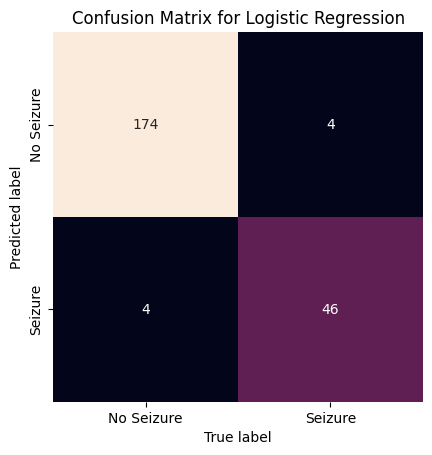


Model: Random Forest


/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

Model saved at: ai2/models/random_forest_model.joblib
Confusion Matrix:
[[174   4]
 [  6  44]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       178
        True       0.92      0.88      0.90        50

    accuracy                           0.96       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.96      0.96      0.96       228



/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

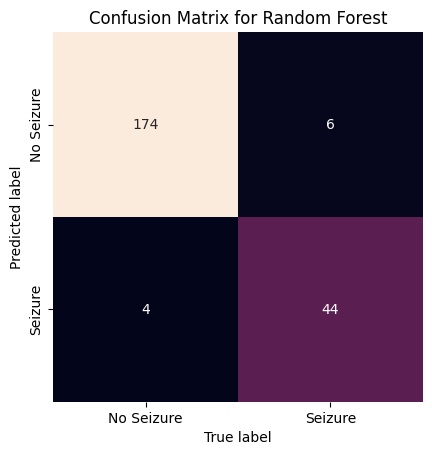


Model: Gradient Boosting


/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

Model saved at: ai2/models/gradient_boosting_model.joblib
Confusion Matrix:
[[173   5]
 [  6  44]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       178
        True       0.90      0.88      0.89        50

    accuracy                           0.95       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.95      0.95      0.95       228



/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

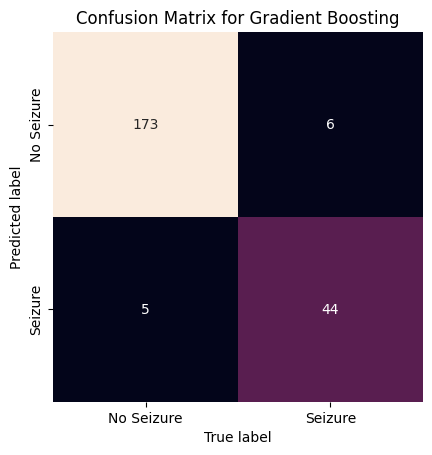


Model: XGBoost
Model saved at: ai2/models/xgboost_model.joblib
Confusion Matrix:
[[175   3]
 [  4  46]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       178
        True       0.94      0.92      0.93        50

    accuracy                           0.97       228
   macro avg       0.96      0.95      0.95       228
weighted avg       0.97      0.97      0.97       228



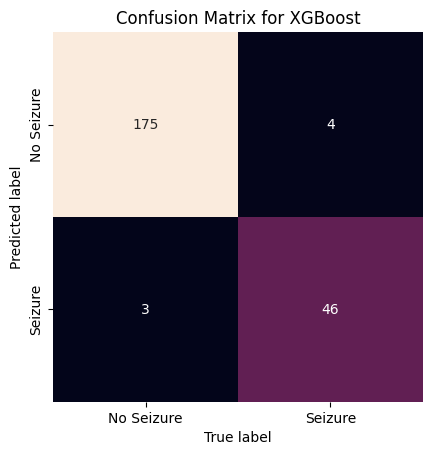

In [12]:
run_classification_models(X, y)

Model: Logistic Regression
Confusion Matrix:
[[174   4]
 [  4  46]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       178
        True       0.92      0.92      0.92        50

    accuracy                           0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228



/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

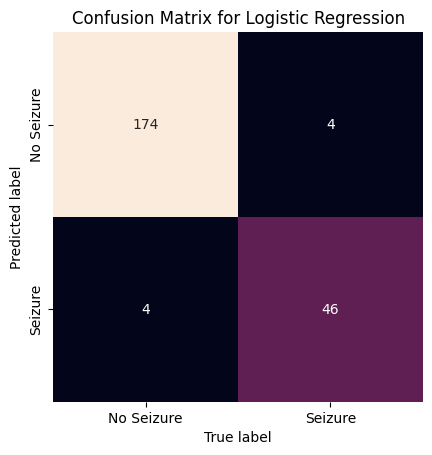


Model: Random Forest


/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

Confusion Matrix:
[[175   3]
 [  4  46]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       178
        True       0.94      0.92      0.93        50

    accuracy                           0.97       228
   macro avg       0.96      0.95      0.95       228
weighted avg       0.97      0.97      0.97       228



/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

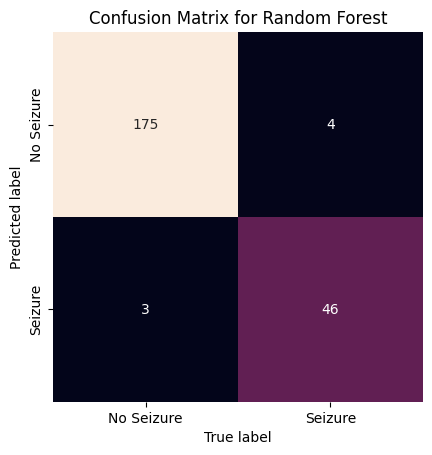

/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 


Model: Gradient Boosting
Confusion Matrix:
[[174   4]
 [  6  44]]
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       178
        True       0.92      0.88      0.90        50

    accuracy                           0.96       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.96      0.96      0.96       228



/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/Samet/Documents/Bildung/BootcampSpiced/github_rice_regression/Capstone_project/ai2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

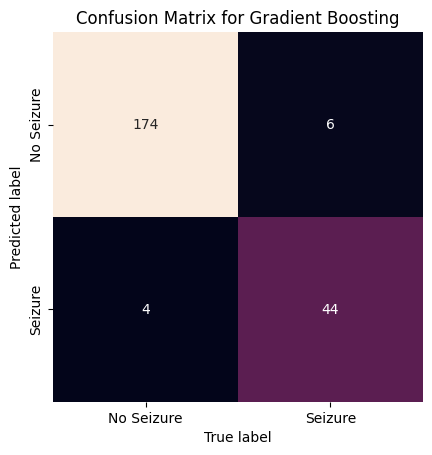


Model: XGBoost
Confusion Matrix:
[[175   3]
 [  4  46]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       178
        True       0.94      0.92      0.93        50

    accuracy                           0.97       228
   macro avg       0.96      0.95      0.95       228
weighted avg       0.97      0.97      0.97       228



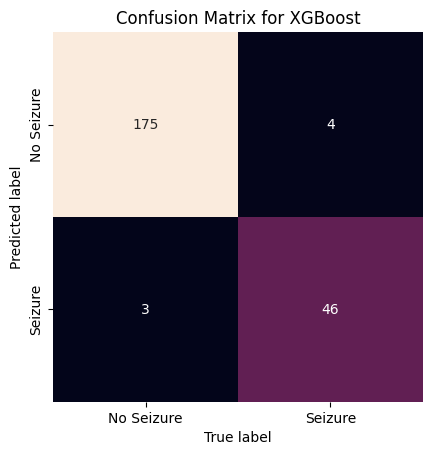

In [ ]:
best_models_dict = run_classification_models(X, y)

In [ ]:
print(best_models_dict)


{}


In [ ]:
regression = best_models_dict['Logistic Regression']
joblib.dump(regression, "ai2/models/logistic_regression_model.joblib")

KeyError: 'Logistic Regression'